# This notebook explores methods for determining the optimal number of clusters in various clustering models.

In [1]:
import pandas as pd

In [2]:
# Load the dataset
tfidf_matrix = pd.read_csv('tf_idf.csv')

/anaconda/envs/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/anaconda/envs/jupyter_env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

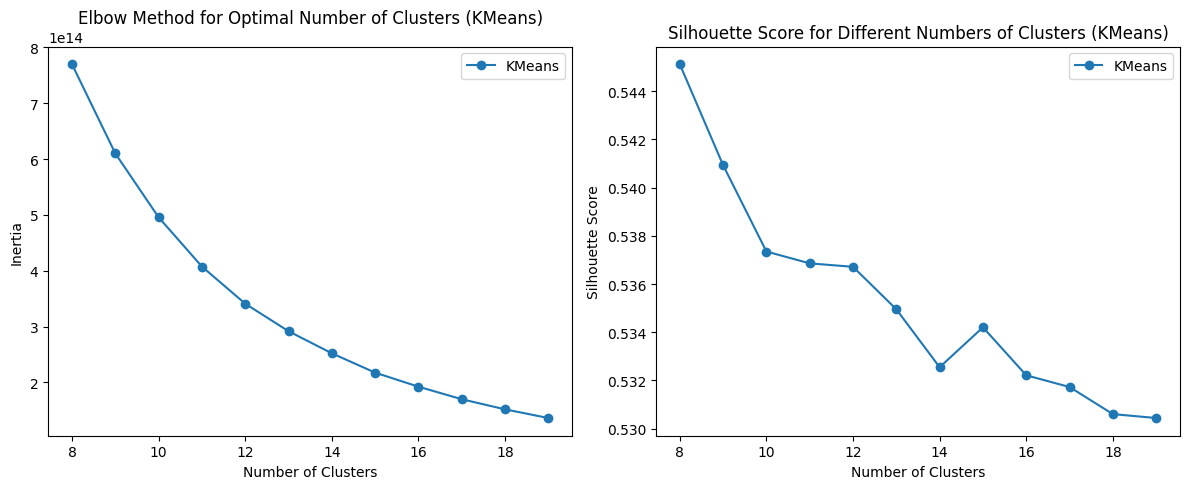

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
import matplotlib.pyplot as plt

# Define the range of clusters to explore
min_clusters = 8
max_clusters = 20

# Convert tfidf_matrix to a NumPy array
tfidf_matrix_array = tfidf_matrix.values

# Randomly shuffle the indices of the dataset
shuffled_indices = np.random.permutation(len(tfidf_matrix_array))

# Select a portion of the shuffled indices for training
sample_size = 100000
sample_indices = shuffled_indices[:sample_size]

# Extract the sample from the tfidf_matrix
tfidf_matrix_sample = tfidf_matrix_array[sample_indices]

# Elbow Method and Silhouette Score for KMeans
inertia_kmeans = []
silhouette_scores_kmeans = []

for k in range(min_clusters, max_clusters):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(tfidf_matrix_sample)
    inertia_kmeans.append(kmeans.inertia_)
    kmeans_clusters = kmeans.predict(tfidf_matrix_sample)
    silhouette_scores_kmeans.append(silhouette_score(tfidf_matrix_sample, kmeans_clusters))

# Plotting
plt.figure(figsize=(12, 5))

# Elbow Method plot for KMeans
plt.subplot(1, 2, 1)
plt.plot(range(min_clusters, max_clusters), inertia_kmeans, marker='o', label='KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters (KMeans)')
plt.legend()

# Silhouette Score plot for KMeans
plt.subplot(1, 2, 2)
plt.plot(range(min_clusters, max_clusters), silhouette_scores_kmeans, marker='o', label='KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters (KMeans)')
plt.legend()

plt.tight_layout()
plt.show()